# 1. Import modules

In [1]:
import yfinance as yf
import share_tracking as share
import performance_calcs as calc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from importlib import reload  
import graphs as graph

# 2. User input
Location of CSV file of portfolio data:

In [2]:
filename = 'sample_portfolio3.csv'

Share index to compare to:

In [3]:
# 'SPY' tracks the S&P500 index
index = 'SPY'

# 3. Get stock data 
Get stock data from API and merge with purchase data from csv file 

In [4]:
# Read user portfolio and convert to Dataframe
user_portfolio = share.get_userdata(filename)
# Get stock price data and merge with user data
merged_portfolio = share.merge_pricedata(user_portfolio, index)


API call in progress...

API call complete



# 4. Calculate portfolio performance metrics 

Perform basic processing and calculations on the data.

In [5]:
# Perform initial processing of portfolio data
portfolio = share.process_data(merged_portfolio)
# Extract variables for performance calculations
val, cash_flows, price, accum, shares, div = share.extract_parameters(portfolio)

In [6]:
# calc.basic_return(val, cash_flows, use_initial_CF=True)
cash_flows
# val

Company,ACN
Date,
2018-03-31,20492250.0
2018-06-30,3909801.0
2018-09-30,0.0
2018-12-31,-1466504.0
2019-03-31,0.0
2019-06-30,-3769308.0
2019-09-30,904045.0
2019-12-31,-5201079.0
2020-03-31,-10955417.0


# 5. Report a summary table of the portfolio

Can specify a start date for the portfolio, otherwise if 'start_date = None' the starting date is the first purchase date of the portfolio.<br> 
start_date can be a full string in 'YYYYMMDD' format or partial string as accepted by a Datetime Index, eg `'20210415'` or `'2018'` or `'2018-06'`

In [7]:
start_date = val.index[0]
start_date

Timestamp('2018-03-31 00:00:00')

Create portfolio and index summary tables

In [8]:
summary = share.stock_summary(cash_flows, shares, price, accum, val, index, date=start_date)   
summary

,Company,Average Price,Current Price,Current Holdings,Current Value,Daily Return (%),Total Return (%),Annualised Return (%),Time Weighted Return (%),Annualised Time Weighted Return (%)
0,ACN,156.1141,307.64,0,0.00,0.00,0.00,0.00,0.00,0.00
1,TOTAL,,,,0.00,,0.00,0.00,0.00,0.00
2,,,,,,,,,,
3,BENCHMARK (SPY),,,,,-0.73,62.26,31090.48,62.26,31090.48


# 6. Plot Portfolio performance data

**Portfolio percentage gain and portfolio value over time**

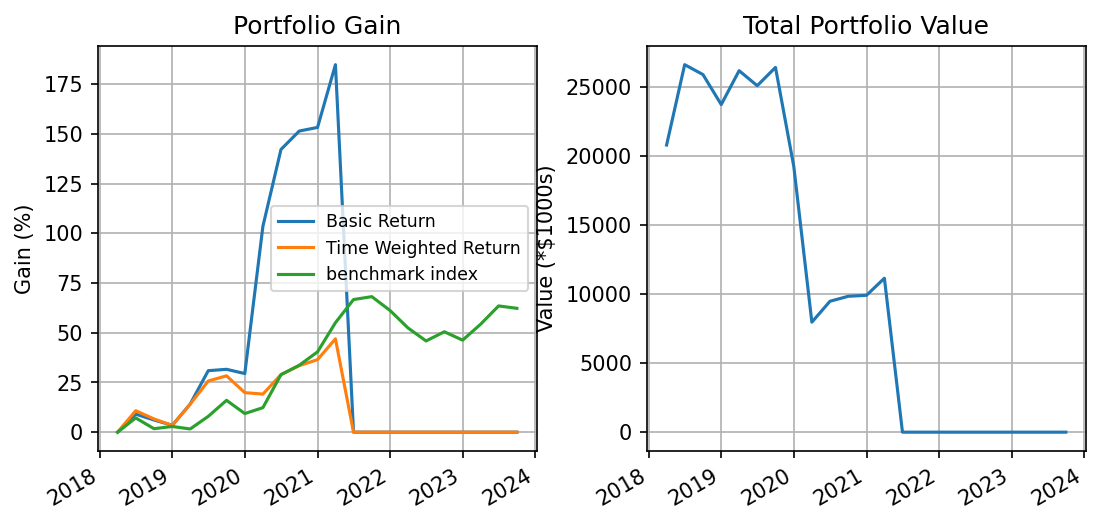

In [9]:
fig1 = graph.plot_portfolio_gain(val, cash_flows, price[index], date=start_date)

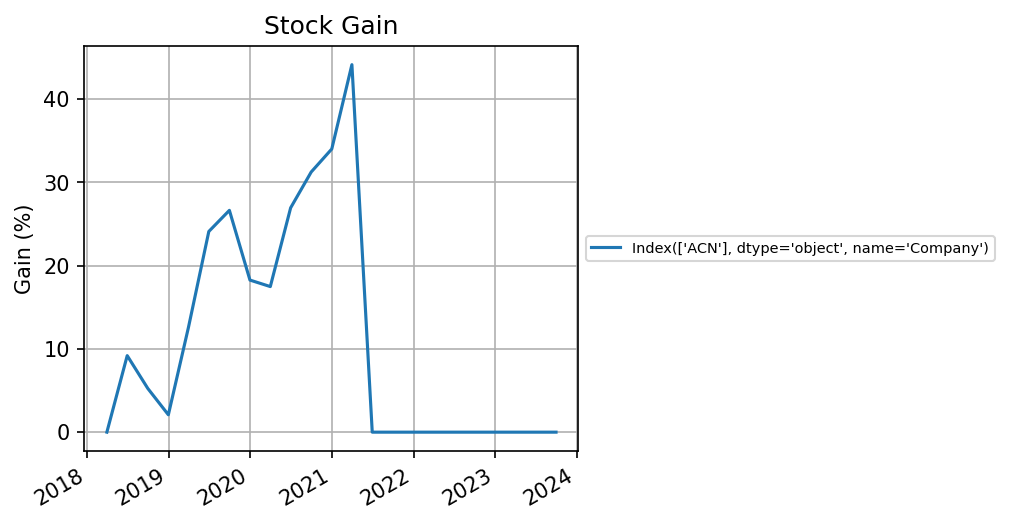

In [10]:
fig2 = graph.plot_stock_gain(val, cash_flows, date=start_date)

**Current Stock holdings**

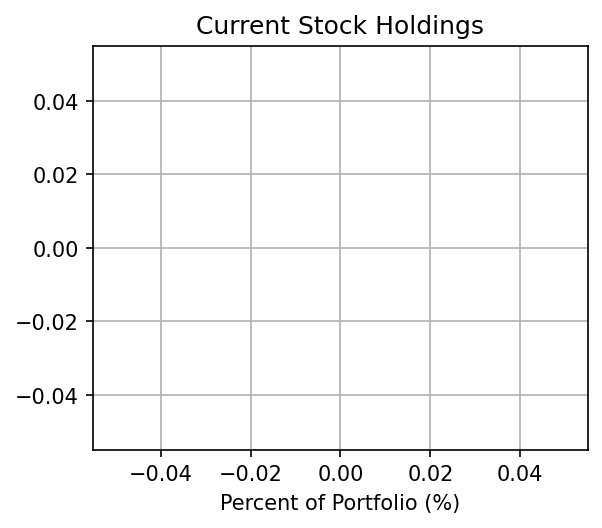

In [11]:
fig3 = graph.plot_stock_holdings(val, date=start_date)

**Annualised returns per stock**

In [12]:
fig4 = graph.plot_annualised_return(val, cash_flows, price[index], date=start_date)

ZeroDivisionError: division by zero

<Figure size 637.5x525 with 0 Axes>